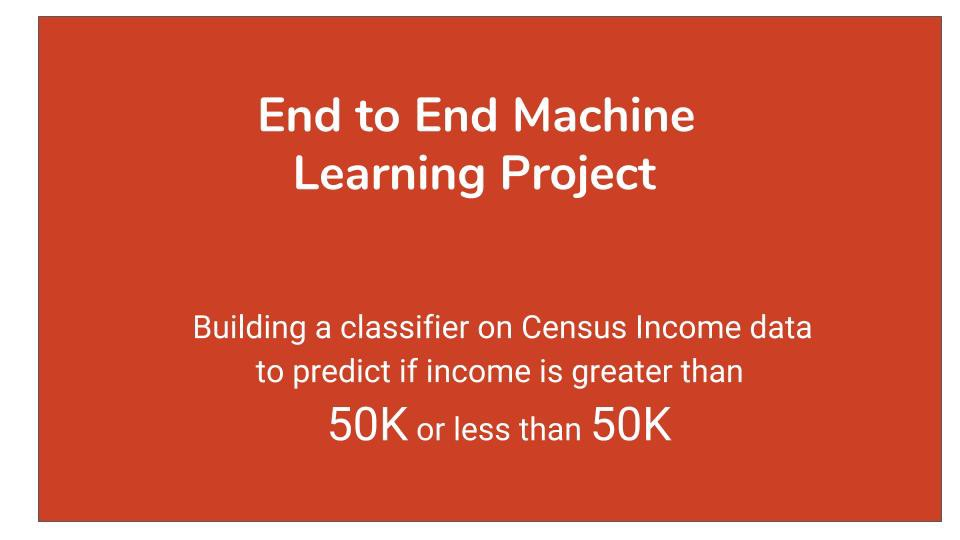

# Census Income Project


# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data
Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task
is to determine whether a person makes over $50K a year

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the
civilian non-institutional population of the US. These are prepared monthly for us by Population Division
here at the Census Bureau. We use 3 sets of controls. These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the
end we come back to all the controls we used. The term estimate refers to population totals derived from
CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.
People with similar demographic characteristics should have similar weights. There is one important caveat
to remember about this statement. That is that since the CPS sample is actually a collection of 51 state
samples, each with its own probability of selection, the statement only applies within state.

# Breakdown of the Problem Statement:
    .Supervised machine learning problem.
    .LogisticRegression.
    .The target value will be Income.


# Aim of The project:
    The objective is to create a model that can predict Income based on its features.



In [1]:
import pandas as pd
df=pd.read_csv('census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [2]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# About columns

age: the age of an individual
    
workclass: a general term to represent the employment status of an individual
    
fnlwgt: final weight. This is the number of people the census believes the entry represents..
    
education: the highest level of education achieved by an individual.
    
education num: the highest level of education achieved in numerical form.
    
marital status: marital status of an individual.
    
occupation: the general type of occupation of an individual
    
relationship: represents what this individual is relative to others.
    
race: Descriptions of an individual’s race
    
sex: the sex of the individual
    
capital gain: capital gains for an individual
    
capital loss: capital loss for an individual
    
hours per week: the hours an individual has reported to work per week
    
native country: country of origin for an individual

# Exploratory data analysis:
    Exploratory Data Analysis or EDA is very crucial for the success of all data science projects. It is an approach to analyze and understand the various aspects of the data.




In [3]:
import numpy as np
#here comparing the data with whenever the ? is present in the data and fill this nan value where the ? is present
df.replace('?',np.nan)

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [4]:
df['Occupation'].describe()


count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: Occupation, dtype: object

In [5]:
df["Occupation"]=df["Occupation"].fillna(df["Occupation"].mode()[0])

In [6]:
df['Workclass'].describe()

count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [7]:
df["Workclass"]=df["Workclass"].fillna(df["Workclass"].mode()[0])


In [8]:
df['Native_country'].describe()

count              32560
unique                42
top        United-States
freq               29169
Name: Native_country, dtype: object

In [9]:
df["Native_country"]=df["Native_country"].fillna(df["Native_country"].mode()[0])

In [10]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

it shows the top five rows data in the dataset

In [11]:
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

 it shows the below five rows data in the dataset

In [12]:
df.sample(5)

Age      Workclass  Fnlwgt      Education  Education_num  \
2777    35        Private   26987        HS-grad              9   
13456   66   Self-emp-inc  220543        HS-grad              9   
25408   19        Private  184121        HS-grad              9   
27212   44        Private  131650     Assoc-acdm             12   
11750   45        Private  170092   Some-college             10   

            Marital_status        Occupation    Relationship    Race      Sex  \
2777             Separated      Adm-clerical   Not-in-family   White   Female   
13456   Married-civ-spouse      Adm-clerical            Wife   White   Female   
25408        Never-married     Other-service       Own-child   White     Male   
27212   Married-civ-spouse   Exec-managerial         Husband   White     Male   
11750             Divorced     Other-service   Not-in-family   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
2777              0             0              40   United-States   <=50K  
13456             0             0              40   United-States    >50K  
25408             0             0              20   United-States   <=50K  
27212             0             0              54   United-States    >50K  
11750             0             0              50   United-States   <=50K

it shows the any of the sample rows data in the dataset

In [13]:
df.shape

(32560, 15)

it shows the how many number of rows and columns in the dataset

In [14]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

it shows the all columns name in the dataset

In [15]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

it will give the dtypes of data ie float int and object with columns name

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


It will shows the basic information about the data like how many columns and rows in the data and null value count
and dtype float or object or int

In [17]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

it shows the unique value no duplicate 

In [18]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

here showing the in all columns non of the value is missing

<AxesSubplot:>

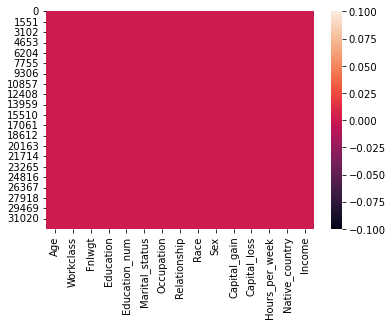

In [19]:
import seaborn as sns
sns.heatmap(df.isnull())

here showing non of the value is missing in datasets

In [20]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

describe():- The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.


# key observations:
    std is high in columns like Age,Capital_gain,Capital_loss,Hours_per_week is grether than 3std it means data is spread out and possibility is having outlier is present.
    mean is grether than median in a columns  Age,Capital_gain,Capital_loss,Hours_per_week it means right skewed data in those columns.
    there is a difference between min value and 25th percentile in a  columns like  Age,Hours_per_week possibility 
    is having a outliers there is outliers is present in a columns newspaper.
    also range of difference between 75th percentile and max value it means possibilities is having a outliers are present

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

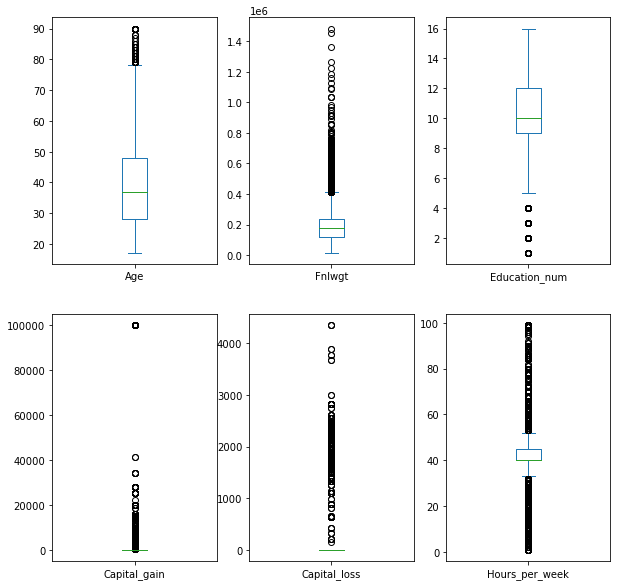

In [21]:
df.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


# Observations:
    here showing that in columns are Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week in those columns are outliers are presented

In [22]:
#separate the categorical feature from datasets for analysis 
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("number of categorical features:", len(categorical_features))

number of categorical features: 9


In [23]:
categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [24]:
df[categorical_features].head()

Workclass   Education       Marital_status          Occupation  \
0   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
1            Private     HS-grad             Divorced   Handlers-cleaners   
2            Private        11th   Married-civ-spouse   Handlers-cleaners   
3            Private   Bachelors   Married-civ-spouse      Prof-specialty   
4            Private     Masters   Married-civ-spouse     Exec-managerial   

     Relationship    Race      Sex  Native_country  Income  
0         Husband   White     Male   United-States   <=50K  
1   Not-in-family   White     Male   United-States   <=50K  
2         Husband   Black     Male   United-States   <=50K  
3            Wife   Black   Female            Cuba   <=50K  
4            Wife   White   Female   United-States   <=50K

In [25]:
c=df['Workclass'].value_counts()
c/c.sum()

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: Workclass, dtype: float64

In [26]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
#lets analysis the categorical features with the help of countplot,countplot is count the values of each categories is presented
#in the each columns it will shows the value counts of each category is presented in the columns it will shows the frequency
#here i created function of categorical features to plot the countplot
def plot_categorical(categorical_features):
    plt.subplots(figsize=(20,6))
    sns.countplot(categorical_features,data=df,hue='Income',dodge=True,palette='ocean')
    plt.xticks(rotation=80)
    plt.xlabel(categorical_features)
    plt.ylabel('Frequency')
    plt.title(categorical_features)
    plt.show()
    

In [28]:
plot_categorical('Workclass')

# obsevations:
    1.  here showing that income in privat workclass <=50k is more as compared to other workclass
    2.  <=50K earners are highest within Private workclass
    3.  50K+ earners are higher than <=50K in only Self-emp-inc level. At all other levels, the trends are reverse.
    4.  It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than   50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business,   start-up, etc. you are more likely to earn better if it gets successful!
    5.  People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
    6.  There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
    7.  People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

In [29]:
c=df['Education'].value_counts()
c/c.sum()

 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: Education, dtype: float64

In [30]:
plot_categorical('Education')

# observations:
    1. here showing that HS_grad person income are more is <=50k as compared to the other educations
    2. <=50K earners are highest HS-grad
    3. 50K+ earners are higher than <=50K in Bachelors and some-colleges . At all other levels, the trends are reverse.
    For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
    6. For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
    7. In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [31]:
c=df['Marital_status'].value_counts()
c/c.sum()

 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name: Marital_status, dtype: float64

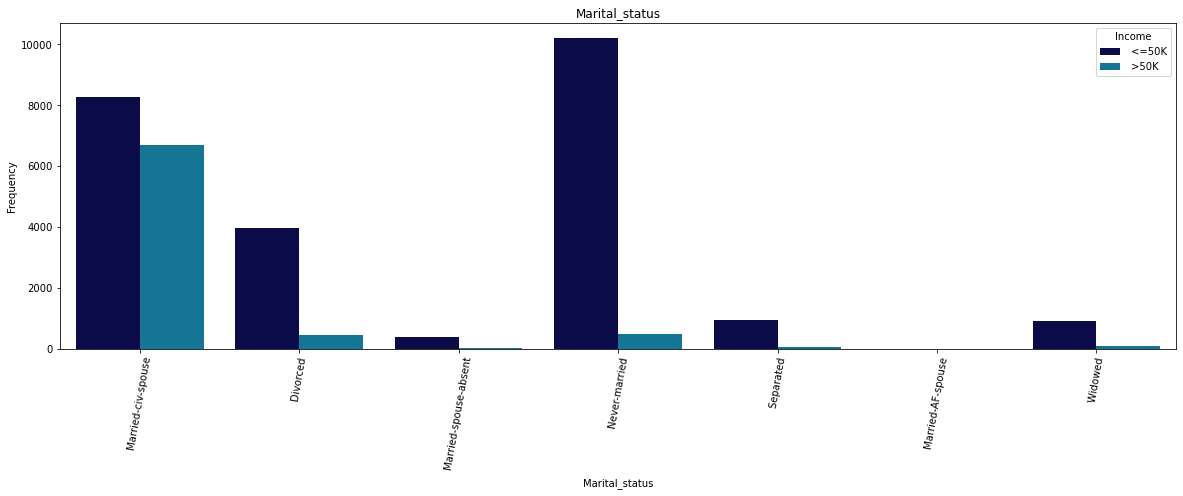

In [32]:
plot_categorical('Marital_status')

# Observation:
    1. here showing that Never_married and Married-civ-spouse marital_status income is <=50k is more as compared to other marital_status
    2. <=50K earners are highest across Never married and Married-civ-spouse
    3. 50K+ earners are highest across Married civ Spouse and low across others.
    4. One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
    5. For others, there are less than 25% of the adults earning more than 50K dollars an year.

In [33]:
c=df['Occupation'].value_counts()
c/c.sum()

 Prof-specialty       0.127150
 Craft-repair         0.125891
 Exec-managerial      0.124877
 Adm-clerical         0.115756
 Sales                0.112101
 Other-service        0.101198
 Machine-op-inspct    0.061486
 ?                    0.056603
 Transport-moving     0.049048
 Handlers-cleaners    0.042076
 Farming-fishing      0.030528
 Tech-support         0.028501
 Protective-serv      0.019932
 Priv-house-serv      0.004576
 Armed-Forces         0.000276
Name: Occupation, dtype: float64

In [34]:
plot_categorical('Occupation')

# obsvarations:
    1. here showing that Prof-specialty earners income is higher is <=50k as compared to the other occupation 
    2.  <=50K earners are highest in Prof-specialty, Adm-clerical and Craft repair
    3. 50K+ earners are highest in Prof specialty, Exec manager, Sales
    4. Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
    5. There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
    5. Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
    6. Around 25% of the people working in Sales earn more than 50K dollars an year.

In [35]:
c=df['Relationship'].value_counts()
c/c.sum()

 Husband           0.405190
 Not-in-family     0.255037
 Own-child         0.155651
 Unmarried         0.105835
 Wife              0.048157
 Other-relative    0.030129
Name: Relationship, dtype: float64

In [36]:
plot_categorical('Relationship')

# observations:
    1.  here showing that relationship with husband income is more is <=50k as compared to the other Relationship
    2.  <=50K earners are highest in husband and not in family
    3.  50K+ earners are highest in husband other are reverse trend
    4.  Wives are equally likely to earn more than 50K dollars an year.
    5. For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
    6.There are just a handful of Unmarried people earning more than 50K dollars an year.

In [37]:
c=df['Race'].value_counts()
c/c.sum()

 White                 0.854269
 Black                 0.095946
 Asian-Pac-Islander    0.031910
 Amer-Indian-Eskimo    0.009552
 Other                 0.008323
Name: Race, dtype: float64

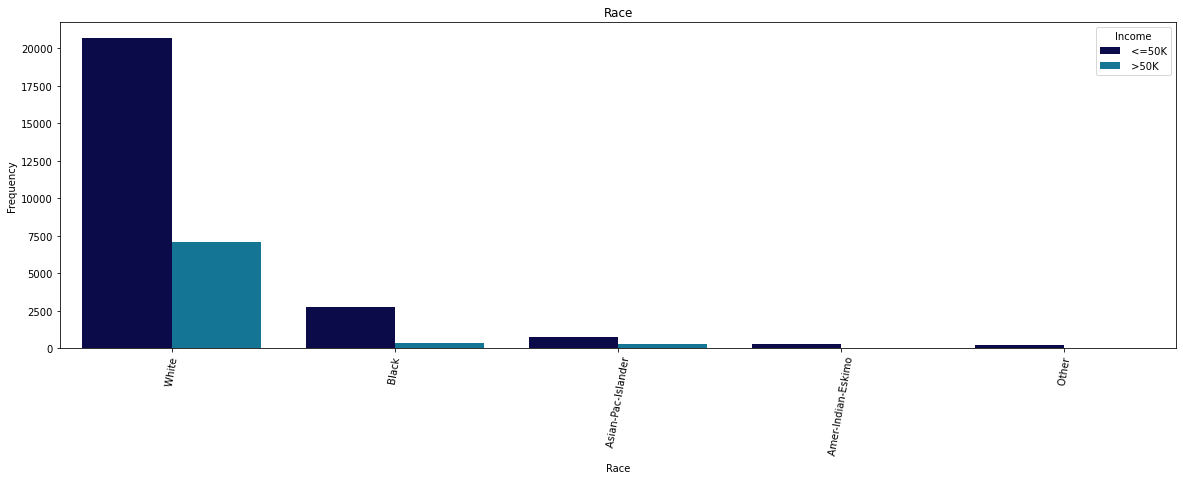

In [38]:
plot_categorical('Race')

# Observations:
    1.  here showing that Race with white income is more is <=50k as compared to the other Race
    2.  <=50K earners are highest in white Race 
    3.  50K+ earners are highest in white Race other are reverse trend
    4.  An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.



In [39]:
c=df['Sex'].value_counts()
c/c.sum()

 Male      0.669195
 Female    0.330805
Name: Sex, dtype: float64

In [40]:
plot_categorical('Sex')

# Observations:
    1.  here showing that sex with Male income is more is <=50k as compared to the other Female
    2.  <=50K earners are highest in Male
    3.  50K+ earners are highest in Male other are reverse trend
    4. For Females, there are less than 10% of the adults earning more than 50K dollars an year.
       In case of Males there are close to 33% of them earning more than 50K dollars an year.

In [41]:
c=df['Native_country'].value_counts()
c/c.sum()

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [42]:
plot_categorical('Native_country')

# # Observations:
    1.  here showing that Native_country with United-States income is more is <=50k as compared to the other Native-Country
    2.  <=50K earners are highest in United-states
    3.  50K+ earners are highest in United-States other are reverse trend
    

In [43]:
label=df['Income'].value_counts().index
data=df['Income'].value_counts().values
fig=plt.figure(figsize=(10,7))
plt.pie(data,labels =label,autopct="%.2f%%",shadow=True,explode=(0,0.1))
plt.title('Income')
plt.legend()
plt.show()

# observations:
    1.Here showing that income is <=50k has more percentage as comparing to the income >50k
    2.The number of people earning more than 50K dollars an year is one third of the people earning less than it.
    3. We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in    today's time!

In [44]:
categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [45]:
#separate the list of numerical variables and print out the numerical features
numerical_features =[feature for feature in df.columns if df[feature].dtypes != 'object' ]
print("number of numerical variables: " , len(numerical_features))

number of numerical variables:  6


In [46]:
#head of numerical features
df[numerical_features].head()

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [47]:
df.hist(figsize=(10,10), grid=False, layout=(4,3), bins = 30)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

# Observation:
    1. here showing that Age,Fnlwgt,capital_gain,Capital_loss columns has right skewness is presents
    2. this columns has more weight in rigth side and this columns has mean is grether than median

<AxesSubplot:xlabel='Age', ylabel='Density'>

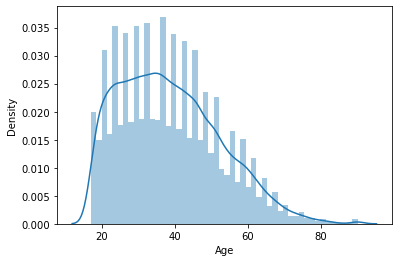

In [48]:
sns.distplot(df['Age'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve

In [49]:
print('Skewness: %f' % df['Age'].skew())
print('Kurtsis: %f' %df['Age'].kurt())

Skewness: 0.558738
Kurtsis: -0.166212


In [50]:
sns.distplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

The Data in the columns is not normalized .The building blocks is out of the normalised curve

In [51]:
print('Skewness: %f' % df['Fnlwgt'].skew())
print('Kurtsis: %f' %df['Fnlwgt'].kurt())

Skewness: 1.446972
Kurtsis: 6.218940


In [52]:
sns.distplot(df['Education_num'])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

The Data in the columns is  normalized .The building blocks is not out of the normalised curve

In [53]:
print('Skewness: %f' % df['Education_num'].skew())
print('Kurtsis: %f' %df['Education_num'].kurt())

Skewness: -0.311630
Kurtsis: 0.623525


In [54]:
sns.distplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

The Data in the columns is not normalized .The building blocks is out of the normalised curve

In [55]:
print('Skewness: %f' % df['Capital_gain'].skew())
print('Kurtsis: %f' %df['Capital_gain'].kurt())

Skewness: 11.953690
Kurtsis: 154.795024


<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

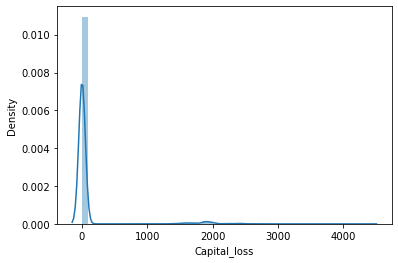

In [56]:
sns.distplot(df['Capital_loss'])

The Data in the columns is not normalized .The building blocks is out of the normalised curve

In [57]:
print('Skewness: %f' % df['Capital_loss'].skew())
print('Kurtsis: %f' %df['Capital_loss'].kurt())

Skewness: 4.594549
Kurtsis: 20.376029


In [58]:
sns.distplot(df['Hours_per_week'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

The Data in the columns is  normalized .The building blocks is not out of the normalised curve

In [59]:
print('Skewness: %f' % df['Hours_per_week'].skew())
print('Kurtsis: %f' %df['Hours_per_week'].kurt())

Skewness: 0.227636
Kurtsis: 2.916505


<AxesSubplot:xlabel='Workclass', ylabel='Capital_gain'>

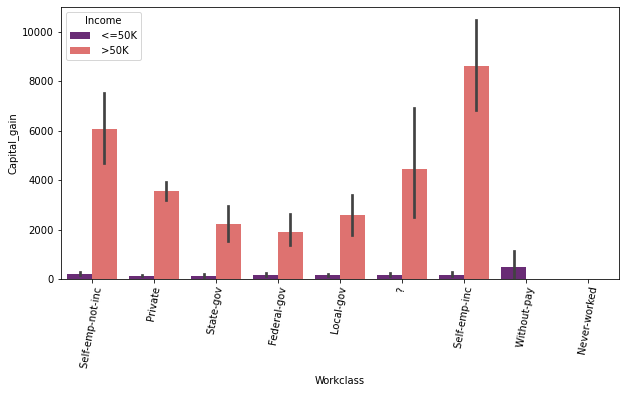

In [60]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Workclass', y='Capital_gain' ,hue='Income',palette='magma',data=df)

# observation:
    1. here showing that capital gain is higher for self_emp_inc
    2. income is >50k for self_emp_inc
    

<AxesSubplot:xlabel='Education', ylabel='Capital_gain'>

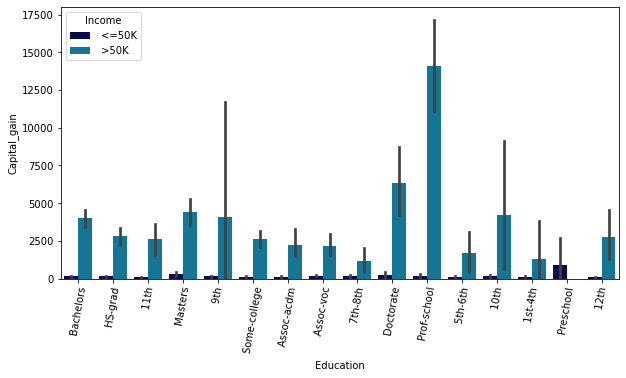

In [61]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Education', y='Capital_gain' ,hue='Income',palette='ocean',data=df)

# Observations:
    1.here showing that Prof-School having capital gain higher 
    2. income is >50k for a prof_school

In [62]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Marital_status', y='Capital_gain' ,hue='Income',palette='viridis',data=df)

<AxesSubplot:xlabel='Marital_status', ylabel='Capital_gain'>

# Observations:
    1.here showing that Married-spouse-absent,separated,Never-married has capitalgain is higher
    2. income is >50k 

In [63]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Occupation', y='Capital_gain' ,hue='Income',palette='spring',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='Capital_gain'>

# Observations:
    1.here showing that private-house-service has capital gain is higher
    2. income is >50k ,other are reverse trend

In [64]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Relationship', y='Capital_gain' ,hue='Income',palette='summer',data=df)

<AxesSubplot:xlabel='Relationship', ylabel='Capital_gain'>

# Observations:
    1. here showing that own-child and unmarried has capital gain is higher
    2. income is >50k

In [65]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Race', y='Capital_gain' ,hue='Income',palette='autumn',data=df)

<AxesSubplot:xlabel='Race', ylabel='Capital_gain'>

# Observations:
    1.here showing that other Race has capital gain is higher
    2.income is >50k

In [66]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=80)
sns.barplot(x='Sex', y='Capital_gain' ,hue='Income',palette='twilight',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Capital_gain'>

# Observations :
    1. here showing that female has higher capital gain as compared to male
    2. income for female is >50k

<AxesSubplot:xlabel='Native_country', ylabel='Capital_gain'>

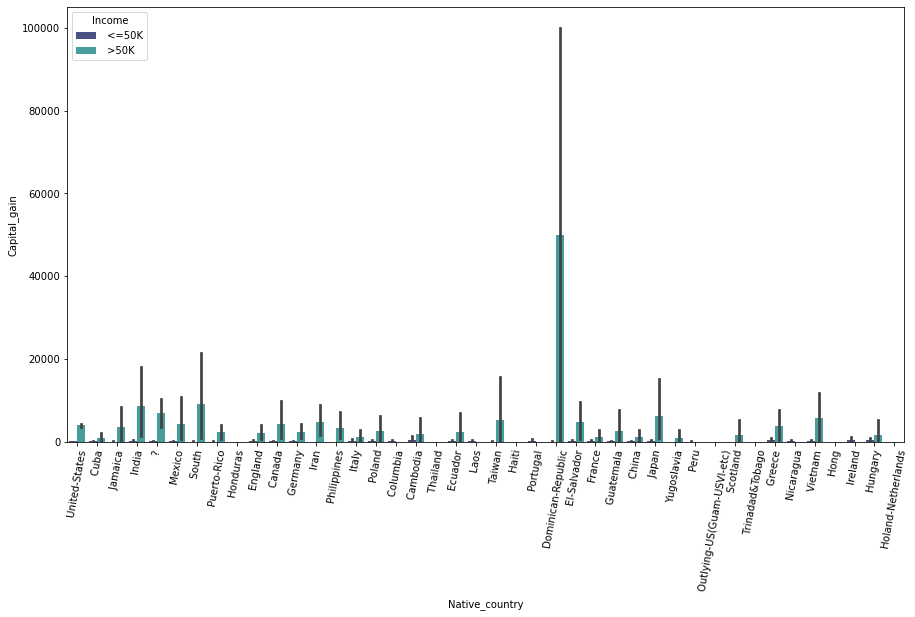

In [67]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)
sns.barplot(x='Native_country', y='Capital_gain' ,hue='Income',palette='mako',data=df)

# Observations:
    1.here showing that Dominican Republic country has higher capital gain other country has reverse trend
    2.income is >50k 

<AxesSubplot:xlabel='Capital_gain', ylabel='Age'>

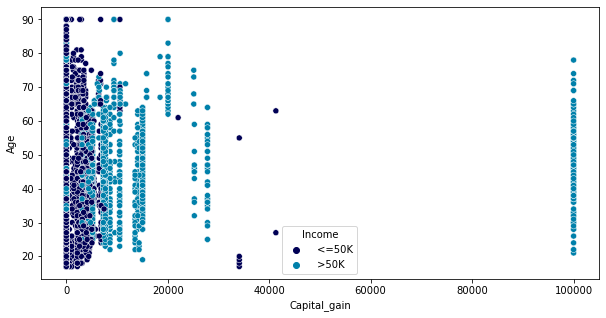

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Capital_gain', y='Age' ,hue='Income',palette='ocean',data=df)

# Observations:
    1.here showing that capital gain higher for income is grether than >50k
    2.here showing that capital gain is 0 for in income is <=50k

<AxesSubplot:xlabel='Capital_gain', ylabel='Fnlwgt'>

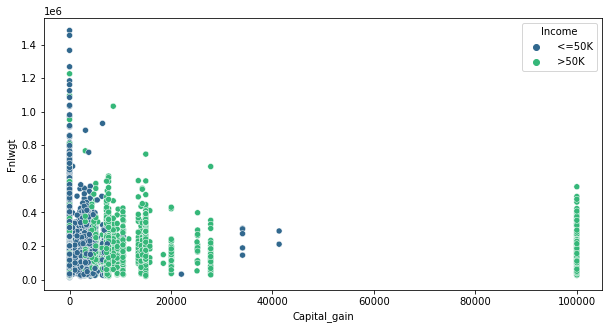

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Capital_gain', y='Fnlwgt' ,hue='Income',palette='viridis',data=df)

# Observations:
    1.here showing that capital gain higher for income is grether than >50k
    2.here showing that capital gain is 0 for in income is <=50k as comparing Fnlwgt

<AxesSubplot:xlabel='Education_num', ylabel='Capital_gain'>

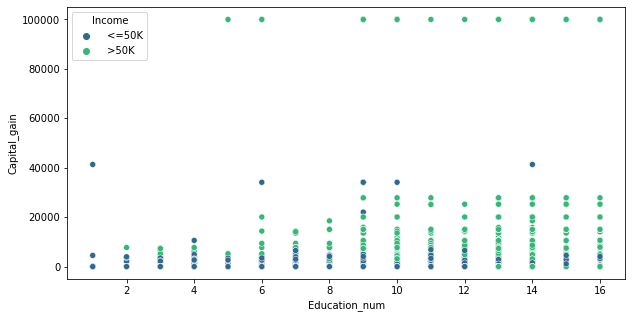

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Education_num', y='Capital_gain' ,hue='Income',palette='viridis',data=df)

# Observations:
    1. no of years spent a educations is grether than 10 up to 16 years  capital gain is higher
    2.income is >50k number of years spent in education  10 to 16
    

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Capital_loss', y='Capital_gain' ,hue='Income',palette='magma',data=df)

<AxesSubplot:xlabel='Capital_loss', ylabel='Capital_gain'>

# Observations:
    1. here showing that income is >50k has capital loss is 0 value is more quantity 
    2.capital gain higher for income is >50k

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Hours_per_week', y='Capital_gain' ,hue='Income',palette='winter',data=df)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Capital_gain'>

# Observations:
    1.here showing that house-per-week value 40 to 60 has income is >50k has more majority 
    2.capital gain higher for income is >50k

# Features Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [74]:
for val in categorical_features:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

In [75]:
df[categorical_features].head()

Workclass  Education  Marital_status  Occupation  Relationship  Race  Sex  \
0          6          9               2           4             0     4    1   
1          4         11               0           6             1     4    1   
2          4          1               2           6             0     2    1   
3          4          9               2          10             5     2    0   
4          4         12               2           4             5     4    0   

   Native_country  Income  
0              39       0  
1              39       0  
2              39       0  
3               5       0  
4              39       0

# Correlations

In [76]:
dfc=df.corr()
dfc

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.033828  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.012231 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.025511     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.017979     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.001151   
Workclass           0.033828      0.012231        0.138974       -0.007710   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.051957   
Education           0.030047      0.016744        0.055510        0.064291   
Education_num       0.122627      0.079932        0.148127        0.050831   
Marital_status     -0.043398     -0.034182       -0.190521       -0.023827   
Occupation          0.025511      0.017979        0.080384       -0.012532   
Relationship       -0.057918     -0.061064       -0.248975       -0.005504   
Race                0.011143      0.018902        0.041910        0.137849   
Sex                 0.048477      0.045572        0.229312       -0.008125   
Capital_gain        1.000000     -0.031614        0.078409       -0.001984   
Capital_loss       -0.031614      1.000000        0.054256        0.000420   
Hours_per_week      0.078409      0.054256        1.000000       -0.002671   
Native_country     -0.001984      0.000420       -0.002671        1.000000   
Income              0.223333      0.150523        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

In [77]:
sns.heatmap(dfc)

<AxesSubplot:>

<AxesSubplot:>

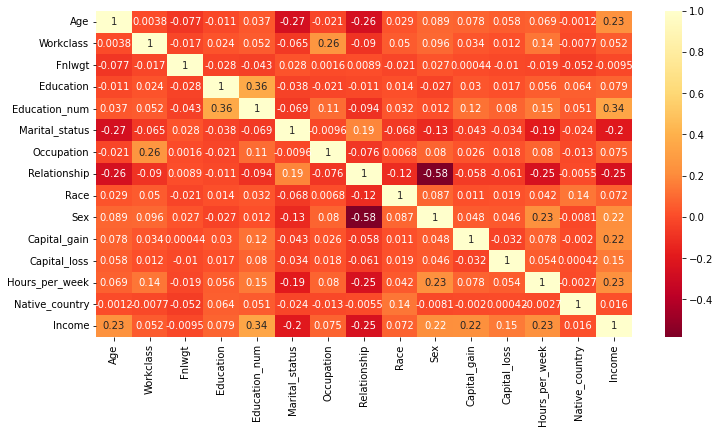

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(dfc,cmap="YlOrRd_r",annot=True)

The corr value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation.


# Observations:
    Education and Education_num columns are correlated with each other 0.36 and 0.36
    Education_num and Education columns are correlated with each other 0.34 and 0.34
    sex and Relationship columns are highly nagative correlated with each other -0.58 and -0.58    
    Education and Education_num columns are correlated with each other 0.36 and 0.36

    

# Removing the outliers:

In [79]:
from scipy.stats import zscore
import numpy as np

In [80]:
z=np.abs(zscore(df))
z

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.837097   1.463883  1.008742   0.335443       1.134779   
1      0.042640   0.090121  0.245046   0.181319       0.420027   
2      1.057031   0.090121  0.425770   2.402489       1.197429   
3      0.775755   0.090121  1.408146   0.335443       1.134779   
4      0.115952   0.090121  0.898170   0.439700       1.523480   
...         ...        ...       ...        ...            ...   
32555  0.849066   0.090121  0.639710   0.852204       0.746077   
32556  0.103982   0.090121  0.335466   0.181319       0.420027   
32557  1.423589   0.090121  0.358811   0.181319       0.420027   
32558  1.215624   0.090121  0.110927   0.181319       0.420027   
32559  0.983720   0.777002  0.929862   0.181319       0.420027   

       Marital_status  Occupation  Relationship      Race       Sex  \
0            0.406183    0.608434      0.900177  0.393675  0.703087   
1            1.734026    0.135480      0.277810  0.393675  0.703087   
2            0.406183    0.135480      0.900177  1.962583  0.703087   
3            0.406183    0.810427      2.211658  1.962583  1.422298   
4            0.406183    0.608434      2.211658  0.393675  1.422298   
...               ...         ...           ...       ...       ...   
32555        0.406183    1.519858      2.211658  0.393675  1.422298   
32556        0.406183    0.100997      0.900177  0.393675  0.703087   
32557        2.249503    1.317864      1.589291  0.393675  1.422298   
32558        0.921660    1.317864      0.966924  0.393675  0.703087   
32559        0.406183    0.608434      2.211658  0.393675  1.422298   

       Capital_gain  Capital_loss  Hours_per_week  Native_country    Income  
0          0.145914      0.216663        2.222120        0.291573  0.563210  
1          0.145914      0.216663        0.035430        0.291573  0.563210  
2          0.145914      0.216663        0.035430        0.291573  0.563210  
3          0.145914      0.216663        0.035430        4.054157  0.563210  
4          0.145914      0.216663        0.035430        0.291573  0.563210  
...             ...           ...             ...             ...       ...  
32555      0.145914      0.216663        0.197407        0.291573  0.563210  
32556      0.145914      0.216663        0.035430        0.291573  1.775537  
32557      0.145914      0.216663        0.035430        0.291573  0.563210  
32558      0.145914      0.216663        1.655200        0.291573  0.563210  
32559      1.888401      0.216663        0.035430        0.291573  1.775537  

[32560 rows x 15 columns]

The abs() function of Pythons standard library returns the absolute value of the given number. Absolute value of a number is the value without considering its sign. Hence absolute of 10 is 10, -10 is also 10. If the number is a complex number, abs() returns its magnitude.
It will make all the data positive


In [81]:
threshold=3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [82]:
df_new=df[(z<3).all(axis=1)]# removing the outliers
df_new

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
4       37          4  284582         12             14               2   
5       49          4  160187          6              5               3   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
4               4             5     4    0             0             0   
5               8             1     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
4                  40              39       0  
5                  16              23       0  
...               ...             ...     ...  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  
32559              40              39       1  

[27417 rows x 15 columns]

In [83]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (32560, 15)
shape after          : (27417, 15)
Percentage Loss      : 0.15795454545454546


In [84]:
df_new['Income'].value_counts()

0    21279
1     6138
Name: Income, dtype: int64

In [85]:
y=df_new["Income"]
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

In [86]:
x=df_new.drop(['Income'],axis=1)
x

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
4       37          4  284582         12             14               2   
5       49          4  160187          6              5               3   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
4               4             5     4    0             0             0   
5               8             1     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  
0                  13              39  
1                  40              39  
2                  40              39  
4                  40              39  
5                  16              23  
...               ...             ...  
32555              38              39  
32556              40              39  
32557              40              39  
32558              20              39  
32559              40              39  

[27417 rows x 14 columns]

In [87]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [88]:
#apply fearure selection and specifying the lasso Regression model and selected a suitable alpha
#bigger the alpha less fearure that will be selected 
# then i use the selectfrommodel object from sklearn which will select the fearures which cofficients are non-zero

feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0)) #remember that to set the seed value of random state
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [89]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [90]:
#lets print the number of total and selected features
selected_feat=x.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 14
selected features: 12
features with coefficients shrank to zero: 1


In [91]:
selected_feat

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week'],
      dtype='object')

In [92]:
train_x=x[selected_feat]
train_x

Age  Workclass  Education  Education_num  Marital_status  Occupation  \
0       50          6          9             13               2           4   
1       38          4         11              9               0           6   
2       53          4          1              7               2           6   
4       37          4         12             14               2           4   
5       49          4          6              5               3           8   
...    ...        ...        ...            ...             ...         ...   
32555   27          4          7             12               2          13   
32556   40          4         11              9               2           7   
32557   58          4         11              9               6           1   
32558   22          4         11              9               4           1   
32559   52          5         11              9               2           4   

       Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  
0                 0     4    1             0             0              13  
1                 1     4    1             0             0              40  
2                 0     2    1             0             0              40  
4                 5     4    0             0             0              40  
5                 1     2    0             0             0              16  
...             ...   ...  ...           ...           ...             ...  
32555             5     4    0             0             0              38  
32556             0     4    1             0             0              40  
32557             4     4    0             0             0              40  
32558             3     4    1             0             0              20  
32559             5     4    0         15024             0              40  

[27417 rows x 12 columns]

In [93]:
train_y=df_new['Income']
train_y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

# Preprocessing of data

In [94]:
from sklearn.preprocessing import power_transform

In [95]:
df_new=power_transform(x,method="yeo-johnson")
df_new

array([[ 0.92387928,  1.65209239, -1.12465326, ..., -0.04054646,
        -2.21338681,  0.17213488],
       [ 0.12850238,  0.01669779,  0.41302315, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [ 1.09846907,  0.01669779,  0.59312735, ..., -0.04054646,
        -0.03813668,  0.17213488],
       ...,
       [ 1.37259752,  0.01669779, -0.24852704, ..., -0.04054646,
        -0.03813668,  0.17213488],
       [-1.32725084,  0.01669779,  0.27467596, ..., -0.04054646,
        -1.71987004,  0.17213488],
       [ 1.04117247,  0.80120487,  1.06334322, ..., -0.04054646,
        -0.03813668,  0.17213488]])

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, power_transform supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

In [96]:
x.shape[1]

14

In [97]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
def vif_calc(x):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['variables']=x.columns
    return(vif)

In [99]:
vif_calc(x)

VIF Factor       variables
0    10.088587             Age
1     8.726587       Workclass
2     4.704655          Fnlwgt
3     9.283774       Education
4    22.608758   Education_num
5     4.275728  Marital_status
6     3.671824      Occupation
7     2.901323    Relationship
8    37.335192            Race
9     4.507928             Sex
10    1.110073    Capital_gain
11    1.004007    Capital_loss
12   15.205051  Hours_per_week
13   77.799757  Native_country

 The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given models betas divide by the variane of a single beta if it were fit alone.
The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient.
...
A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.


In [100]:
from imblearn.over_sampling import SMOTE

# SMOTE(Synthetic Minority over-sampling):
    SMOTE is an over-sampling method it creates synthetic samples of the minority class hence making the minority class 
    equal to the majority class SOMTE does this by selecting simillar records and alterning that record one column at 
     a time by a random amount within the difference to the neighboring records

In [101]:
smt=SMOTE()

In [102]:
x,y=smt.fit_resample(x,y)
y

0        0
1        0
2        0
3        0
4        0
        ..
42553    1
42554    1
42555    1
42556    1
42557    1
Name: Income, Length: 42558, dtype: int32

In [103]:
y.value_counts()

0    21279
1    21279
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

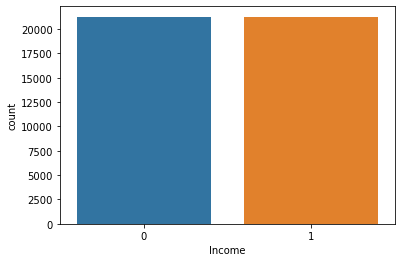

In [104]:
sns.countplot(y)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.81335441,  1.62679303, -1.08874311, ..., -0.03059007,
        -2.77065209,  0.18593981],
       [-0.17319753,  0.14454036,  0.32042145, ..., -0.03059007,
        -0.14751934,  0.18593981],
       [ 1.05999239,  0.14454036,  0.52354091, ..., -0.03059007,
        -0.14751934,  0.18593981],
       ...,
       [ 0.23786578,  0.14454036, -1.08850884, ..., -0.03059007,
         1.01831743,  0.18593981],
       [ 0.07344045,  0.14454036, -0.69511197, ..., -0.03059007,
        -0.14751934,  0.18593981],
       [ 0.15565311,  0.14454036,  0.30121162, ..., -0.03059007,
        -0.05036628,  0.18593981]])

# Machine learning models


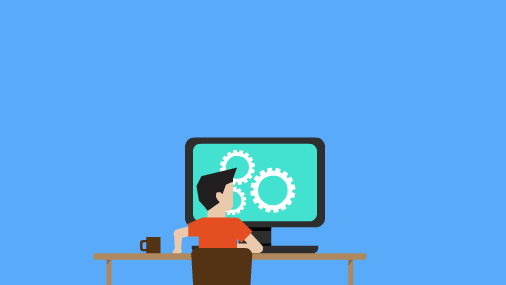

In the previuos seciton we have made X as the features and y as Income  - the target value we want to predict.



# Assumptions:
    .This is a Logistic Regressions  problem so we will use logisticsRegression  and classifications 
    .Train test split will be a 75:25 ratio respectively



# Models we will use:
    .Logistic Regression
    .Decision Tree Classifier
    .Random Forest Regressor
    .Support Vector Machines
    .GaussianNB
    .KNeighborsClassifier
    .AdaBoostClassifier
    .GradientBoostingClassifier
    .XGBClassifier

# The Process of Modeling the Data:
    .Importing the model

    .Fitting the model

    .Predicting Item Outlet Sales

    .Classification metrics




# Score Metrics for Classification:
    .Accuracy - Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem.



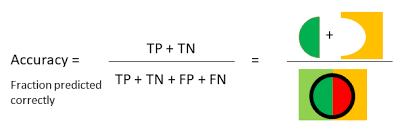

# key:
    .TP - True Positive
    .TN - True Negitive
    .TP - True Positive
    .TN - True Negitive



 .Precision - Answers the following question: what proportion of predicted Positives is truly Positive?

.Precision = (TP)/(TP+FP)

.Recall - Answers the following question: what proportion of actual Positives is correctly classified?

.Recall = (TP)/(TP+FN)

.f1 score - A number between 0 and 1, the harmonic mean of precision and recall.



# Logistic Regression:
    Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model.




# LinearRegression:
    Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. 



In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [155]:
train_x,test_x,train_y,test_y=train_test_split(train_x,train_y,test_size=.30,random_state=0)

In [156]:
train_x.shape

(2256, 12)

In [157]:
train_y.shape

(2256,)

In [158]:
test_x.shape

(968, 12)

In [159]:
test_y.shape

(968,)

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm


In [126]:
lgr = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
gds=GridSearchCV(lgr,parameters)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']})

In [127]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [151]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,5000,10000,15000,20000]}



In [152]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      5000, 10000, 15000, 20000]})

In [153]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 2000}


In [135]:
param_grid={'random_state': list(range(1,100))}

In [136]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [137]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [139]:
param_grid={'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0],
    'warm_start':[True,False],
    'dual':[True,False]}

In [140]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0],
                         'warm_start': [True, False]})

In [141]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'dual': False, 'tol': 0.1, 'warm_start': True}


In [142]:
param_grid={    
    'fit_intercept':[False,True],
    'class_weight':[dict,'balanced',None]}


In [143]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': [<class 'dict'>, 'balanced', None],
                         'fit_intercept': [<class 'bool'>, True]})

In [144]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': <class 'dict'>, 'fit_intercept': True}


In [155]:
param_grid={ 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'n_jobs':[0,1,2,3,4,5,6,7,8,9,10,-1,None]
}


In [156]:
lgr = LogisticRegression()
gds=GridSearchCV(lgr,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [157]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'multi_class': 'auto', 'n_jobs': 1, 'solver': 'liblinear'}


In [161]:
lgr=LogisticRegression(C=0.001,penalty='l2',dual=False,max_iter=10000,random_state=0,tol=0.1,warm_start=True,class_weight='balanced' ,fit_intercept=True,solver='saga',multi_class='auto',n_jobs=1)
lgr.fit(train_x,train_y)
lgr.score(train_x,train_y)
pred=lgr.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8006198347107438
[[719  29]
 [164  56]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       748
           1       0.66      0.25      0.37       220

    accuracy                           0.80       968
   macro avg       0.74      0.61      0.62       968
weighted avg       0.78      0.80      0.76       968



# GaussianNB:
    It's  assumed that all the features are following a gaussian distribution i.e, normal distribution

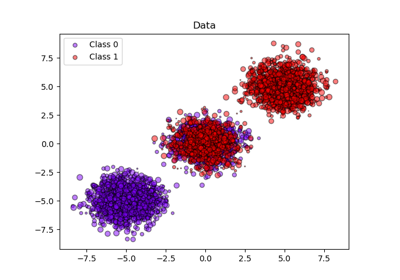

In [185]:
from sklearn.naive_bayes import GaussianNB
param_grid={
    'var_smoothing': [1e-9,0.10,0.20,0.30,0.40,0.50]}


In [186]:
gnb=GaussianNB()
gds=GridSearchCV(gnb,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.2, 0.3, 0.4, 0.5]})

In [187]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'var_smoothing': 0.5}


In [163]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB(var_smoothing=0.5)
gnb.fit(train_x,train_y)
gnb.score(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.8181818181818182
[[739   9]
 [167  53]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       748
           1       0.85      0.24      0.38       220

    accuracy                           0.82       968
   macro avg       0.84      0.61      0.63       968
weighted avg       0.82      0.82      0.78       968



# Support Vector Machines:
    In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.




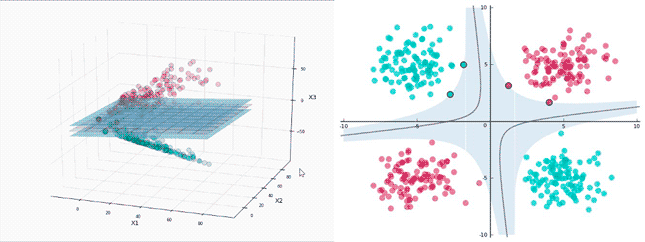

In [ ]:
from sklearn.svm import SVC
parameters={'kernel':('linear','rbf','poly')}
svc=SVC()
gds=GridSearchCV(svc,parameters)
gds.fit(train_x,train_y)

In [ ]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

In [194]:
param_grid={'C':[1, 10,20,30,40,50,60,70,80,90,100],'gamma':('scale', 'auto')}
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'gamma': ('scale', 'auto')})

In [195]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'C': 20, 'gamma': 'scale'}


In [196]:
param_grid={
    'max_iter':[100,300,600,1000,1200,1500,2000,50000,10000,-1],
    'tol':[0.1,0.01,0.001,0.0001,0.00001,1.0]}


In [197]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'max_iter': [100, 300, 600, 1000, 1200, 1500, 2000,
                                      50000, 10000, -1],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0]})

In [198]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_iter': 1200, 'tol': 0.1}


In [199]:
param_grid={'cache_size':[100,200,300,400,500,600,700,800,900,1000],
    'shrinking':[False,True],
    'coef0':[0.0,0.1,0.001,0.0001,1.0,1,1e-3]}

In [200]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'cache_size': [100, 200, 300, 400, 500, 600, 700, 800,
                                        900, 1000],
                         'coef0': [0.0, 0.1, 0.001, 0.0001, 1.0, 1, 0.001],
                         'shrinking': [False, True]})

In [201]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'cache_size': 100, 'coef0': 0.0, 'shrinking': False}


In [204]:
param_grid={
    'random_state': list(range(1,100))
}



In [205]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [206]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [209]:
param_grid={'decision_function_shape':['ovo','ovr'],
    'break_ties':[True,False],
    'class_weight':['balanced',dict,None]
}

In [210]:
svc=SVC()
gds=GridSearchCV(svc,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=SVC(),
             param_grid={'break_ties': [True, False],
                         'class_weight': ['balanced', <class 'dict'>, None],
                         'decision_function_shape': ['ovo', 'ovr']})

In [211]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'break_ties': True, 'class_weight': None, 'decision_function_shape': 'ovr'}


In [164]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1,gamma='auto',cache_size=100,coef0=0.0,tol=0.1,max_iter=1200,shrinking =False,break_ties=True,class_weight='balanced',decision_function_shape='ovr',random_state=1,verbose=False)
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.7582644628099173
[[649  99]
 [135  85]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       748
           1       0.46      0.39      0.42       220

    accuracy                           0.76       968
   macro avg       0.64      0.63      0.63       968
weighted avg       0.74      0.76      0.75       968



# KNeighborsClassifier:
    By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points. knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') knn.fit(X_train, y_train)


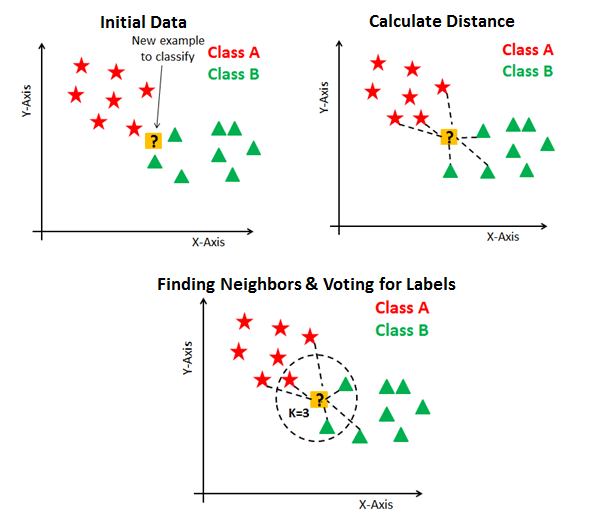

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [229]:
param_grid = {  'n_neighbors': list(range(1,30))}


In [230]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [231]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_neighbors': 12}


In [234]:
param_grid={'leaf_size': list(range(1,50))}

In [235]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [236]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'leaf_size': 12}


In [237]:
param_grid={'p': [1,2,3,4,5,6,7,8,9,10]}

In [238]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [239]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'p': 1}


In [240]:
parameters={'weights':('uniform', 'distance'),'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')}
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,parameters)
gds.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'weights': ('uniform', 'distance')})

In [241]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'ball_tree', 'weights': 'uniform'}


In [242]:
param_grid={
    'n_jobs':[1,2,3,4,5,6,7,8,9,10,-1,None],
    'metric_params':[dict,None],
    'metric' :[str , callable,'minkowski']

}


In [243]:
knn=KNeighborsClassifier()
gds=GridSearchCV(knn,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': [<class 'str'>, <built-in function callable>,
                                    'minkowski'],
                         'metric_params': [<class 'dict'>, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, None]})

In [244]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1}


In [166]:
knn=KNeighborsClassifier(n_neighbors=12,leaf_size=12,p=1,algorithm='ball_tree',weights='uniform',metric='minkowski',metric_params=None,n_jobs=1) 
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn=knn.predict(test_x)
print(accuracy_score(test_y,predknn))
print(confusion_matrix(test_y,predknn))
print(classification_report(test_y,predknn))

0.8460743801652892
[[706  42]
 [107 113]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       748
           1       0.73      0.51      0.60       220

    accuracy                           0.85       968
   macro avg       0.80      0.73      0.75       968
weighted avg       0.84      0.85      0.84       968



# Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label.
A decision tree classifier. Parameters criterion{“gini”, “entropy”}, default=”gini” The function to measure the quality of a split.



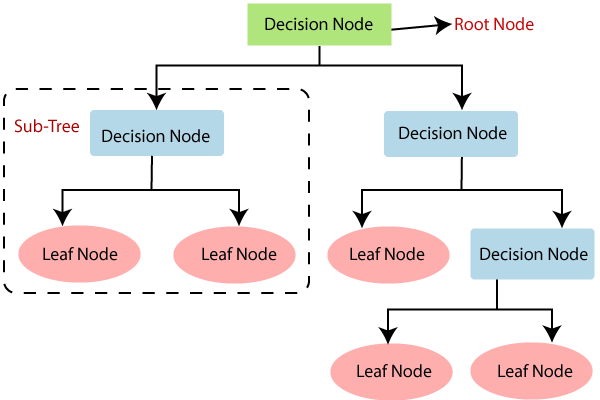

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
param_grid = {'max_depth': [3, 5, 10,20,30,40,50,60,70,80,90,100,None],
               'min_samples_split': [2, 5, 10],  
                 'min_samples_leaf': [1,2,3]}


In [250]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]})

In [251]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [252]:
parameters={'criterion':('gini','entropy'),'splitter':('best', 'random'),'max_features': ('auto', 'sqrt', 'log2',None)} 
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,parameters)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'splitter': ('best', 'random')})

In [253]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [256]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001]}

In [257]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [258]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 40, 'min_weight_fraction_leaf': 0.001}


In [259]:
param_grid={'random_state':list(range(0,50)),
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'class_weight':[dict, 'list of dict' , 'balanced',None]}

In [260]:
dtc=DecisionTreeClassifier()
gds=GridSearchCV(dtc,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [<class 'dict'>, 'list of dict',
                                          'balanced', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [261]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': None, 'min_impurity_decrease': 0.001, 'random_state': 0}


In [169]:
dtc=DecisionTreeClassifier(max_depth=30,min_samples_leaf=3,min_samples_split=2,criterion='entropy',max_features=None,splitter="best",class_weight=None,max_leaf_nodes=100,min_impurity_decrease=0.0,min_weight_fraction_leaf=0.0,random_state=4)
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.8398760330578512
[[696  52]
 [103 117]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       748
           1       0.69      0.53      0.60       220

    accuracy                           0.84       968
   macro avg       0.78      0.73      0.75       968
weighted avg       0.83      0.84      0.83       968



# Ensemble method:
Ensemble method is a machine learning paradigm where multiple model(often called as week learner) are trained to solve the same 
problems and combined to get better result.The main hypothesis is that when week model are correctly combined we can obtain
more accurate and/or robest model

Bagging that often consider is a homogenous week learner,learn them independently from each other in parallel and combine them 
following some kind of determinstic averageing process

Boosting that often considering homogeneous week learner,learns them sequentially  in avery adaptive way (a base model depends
 on previous ones) and combines them following a determinstic strategy 
1] Bagging---> Random Forest classifier

2] Boosting---> Ada Boost classifier\ Gradient boosting\ Voting classifier\\ XGBoost

Note--->
Bagging and boosting work with homogenous(same) models---- generally  DecisionTree

# RandomForestClassifier:
    The random forest classifier divides this dataset into subsets. These subsets are given to every decision tree in the random forest system. Each decision tree produces its specific output. For example, the prediction for trees 1 and 2 is apple.


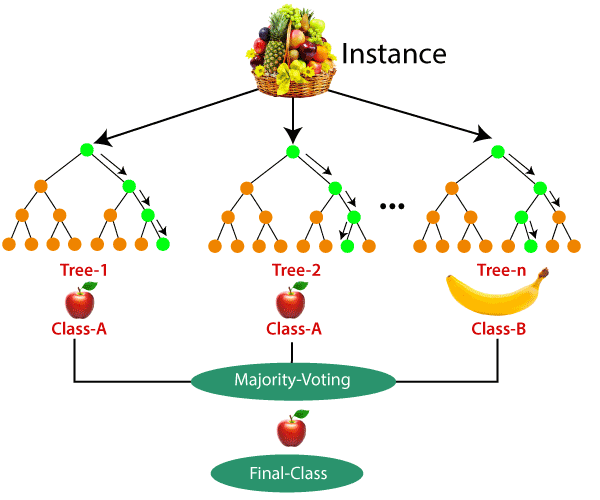

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
param_grid={
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}


In [265]:
rf=RandomForestClassifier()
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [266]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4}


In [267]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
    'criterion' :['gini','entropy'],
    'n_jobs':[1,2,3,4,5,6,7,8,9.10,None]}
    
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9.1, None]})

In [268]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'gini', 'max_leaf_nodes': 100, 'n_jobs': 2}


In [271]:
param_grid={
 'min_samples_split': [2, 5, 10]}

In [272]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [2, 5, 10]})

In [273]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 10}


In [274]:
param_grid={ 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [275]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 1400}


In [276]:
param_grid={
    'random_state': list(range(1,50)),
    'warm_start':[True,False],
    'max_samples':[0,1,None]
}


In [277]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0, 1, None],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'warm_start': [True, False]})

In [278]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_samples': None, 'random_state': 35, 'warm_start': True}


In [279]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001],
    'min_impurity_decrease':[0.0,0.1,0.001,0.0001],
    'class_weight':[dict, 'list of dicts' , 'balanced','balanced_subsample',None],
    'oob_score':[True,False]
}

In [280]:
rf=RandomForestClassifier()  
gds=GridSearchCV(rf,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [<class 'dict'>, 'list of dicts',
                                          'balanced', 'balanced_subsample',
                                          None],
                         'min_impurity_decrease': [0.0, 0.1, 0.001, 0.0001],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001],
                         'oob_score': [True, False]})

In [281]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'class_weight': None, 'min_impurity_decrease': 0.0001, 'min_weight_fraction_leaf': 0.001, 'oob_score': False}


In [171]:
rf=RandomForestClassifier(n_estimators=1400,random_state=35,bootstrap=True,max_depth=30,max_features='auto',min_samples_leaf=4,criterion='gini',max_leaf_nodes=100,n_jobs=2,min_samples_split=10,max_samples=None,warm_start=True,class_weight=None,min_impurity_decrease=0.0001,min_weight_fraction_leaf=0.001,oob_score=False)
#RandomForestClassifier(100)--> default
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

0.8698347107438017
[[714  34]
 [ 92 128]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       748
           1       0.79      0.58      0.67       220

    accuracy                           0.87       968
   macro avg       0.84      0.77      0.79       968
weighted avg       0.86      0.87      0.86       968



# AdaBoostClassifier:
    AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.


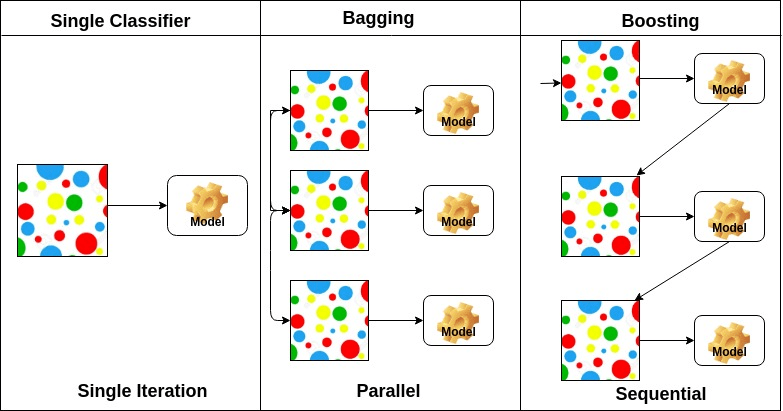

In [172]:
from sklearn.ensemble import AdaBoostClassifier

In [291]:
param_grid={'n_estimators':[50,100,500,1000,1500,2000]}
    


In [292]:
ad=AdaBoostClassifier() 
gds=GridSearchCV(ad,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 500, 1000, 1500, 2000]})

In [293]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 500}


In [294]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0],'algorithm': ["SAMME","SAMME.R"]}
    


In [295]:
ad=AdaBoostClassifier() 
gds=GridSearchCV(ad,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [296]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0}


In [297]:
param_grid={
    'random_state': list(range(1,100))}


In [298]:
ad=AdaBoostClassifier() 
gds=GridSearchCV(ad,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [299]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 1}


In [173]:
#AdaBoostClassifier(base_estimators=DecisionTreeClassifier(),n_estimators=50,lerning_rate=1.0) by default
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.0,n_estimators=500,random_state=1)
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.868801652892562
[[703  45]
 [ 82 138]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       748
           1       0.75      0.63      0.68       220

    accuracy                           0.87       968
   macro avg       0.82      0.78      0.80       968
weighted avg       0.86      0.87      0.86       968



# GradientBoosting:
    The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models. AdaBoost was the first algorithm to deliver on the promise of boosting..



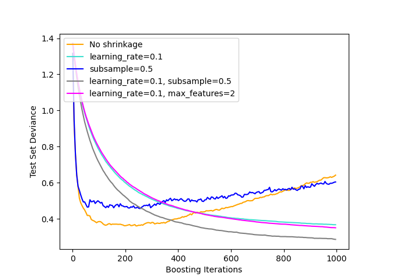

In [174]:
  from sklearn .ensemble import GradientBoostingClassifier

In [137]:
param_grid={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,150,200,300,400,500, None]}


In [138]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       150, 200, 300, 400, 500, None]})

In [139]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 10}


In [144]:
param_grid={'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4]}

In [141]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4]})

In [142]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 2}


In [147]:
param_grid={
 'min_samples_split': [2, 5, 10],
  'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

In [148]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_samples_split': [2, 5, 10],
                         'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                       0.9]})

In [149]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_samples_split': 2, 'subsample': 0.9}


In [150]:
param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [151]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]})

In [152]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [157]:
param_grid={
    'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None]}

In [158]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                            100, None]})

In [159]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_leaf_nodes': 100}


In [160]:
 param_grid={
   'criterion' :['mse','mae','friedman_mse', 'squared_error']}


In [161]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse',
                                       'squared_error']})

In [162]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'criterion': 'mse'}


In [163]:
param_grid={
    'random_state': list(range(1,100))}

In [164]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [165]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'random_state': 19}


In [166]:
param_grid={
    'warm_start':[True,False],
    'tol':[1e-4,0.1,0.01,0.001,0.0001],
    'init':['estimator','zero',None],
    'ccp_alpha':[0.1,0.001,0.0001,.1,1.0]}



In [167]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.001, 0.0001, 0.1, 1.0],
                         'init': ['estimator', 'zero', None],
                         'tol': [0.0001, 0.1, 0.01, 0.001, 0.0001],
                         'warm_start': [True, False]})

In [168]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'ccp_alpha': 0.0001, 'init': 'zero', 'tol': 0.0001, 'warm_start': True}


In [174]:
param_grid={
    'min_weight_fraction_leaf':[0.0,0.1,0.001,0.0001]
}


In [175]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'min_weight_fraction_leaf': [0.0, 0.1, 0.001, 0.0001]})

In [176]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_weight_fraction_leaf': 0.0}


In [177]:
param_grid={'n_iter_no_change':[10,50,100,200,400,500,700,1000,None],
    'loss':['deviance', 'exponential']}

In [178]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'n_iter_no_change': [10, 50, 100, 200, 400, 500, 700,
                                              1000, None]})

In [179]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'loss': 'deviance', 'n_iter_no_change': 200}


In [182]:
param_grid={    
    'validation_fraction':[0,0.1,0.001,0.0001,1.0]}


In [183]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'validation_fraction': [0, 0.1, 0.001, 0.0001, 1.0]})

In [184]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'validation_fraction': 0}


In [185]:
param_grid={ 'min_impurity_decrease':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10],
    'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,.1,1.0,1]}


In [186]:
gb=GradientBoostingClassifier()
gds=GridSearchCV(gb,param_grid)
gds.fit(train_x,train_y)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.1,
                                           1.0, 1],
                         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 0.1]})

In [187]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1, 'min_impurity_decrease': 0.0}


In [175]:
gb=GradientBoostingClassifier(max_depth= 10, max_features= 'auto', min_samples_leaf= 2,min_samples_split= 2, n_estimators= 200, subsample= 0.9,init='zero', random_state=19, tol= 0.0001, warm_start=True,loss='deviance', min_weight_fraction_leaf= 0.0, n_iter_no_change=200,ccp_alpha=0.0001, criterion='mse',max_leaf_nodes=100,learning_rate=0.1, min_impurity_decrease= 0.0)
gb.fit(train_x,train_y)
gb_pred=gb.predict(test_x)
print(accuracy_score(test_y,gb_pred))
print(confusion_matrix(test_y,gb_pred))
print(classification_report(test_y,gb_pred))

0.8615702479338843
[[700  48]
 [ 86 134]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       748
           1       0.74      0.61      0.67       220

    accuracy                           0.86       968
   macro avg       0.81      0.77      0.79       968
weighted avg       0.86      0.86      0.86       968



In [176]:
from xgboost.sklearn import XGBClassifier

In [191]:
param_grid={  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [192]:
import warnings
warnings.filterwarnings('ignore')
xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[00:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [193]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'n_estimators': 200}


In [203]:
param_grid={'max_depth': [3,5,7,9,11,13,15,17,18,19,20,30,50,60,70,80,90,100 ,None]}

In [204]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [205]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'max_depth': 3}


In [208]:
param_grid={'min_child_weight':[1,2,3,4,5,6,7,8,9,10]}

In [209]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [210]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'min_child_weight': 9}


In [211]:
 param_grid={ 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10],
    'subsample':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [212]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [213]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'gamma': 0.2, 'subsample': 0.9}


In [214]:
param_grid={ 'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.95,0.100]}

In [215]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [216]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bytree': 0.2}


In [217]:
param_grid={'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
      'eta': [.3, .2, .1, .05, .01, .005]}

In [218]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [219]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'eta': 0.1, 'reg_alpha': 1}


In [220]:
param_grid={'learning_rate':[.0001,.001,0.01,.1,1.0],
        'random_state': list(range(1,100))}


In [221]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[01:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_est...obs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                         

In [222]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'learning_rate': 0.1, 'random_state': 1}


In [224]:
param_grid={'booster':['gbtree','gblinear'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90,100,None],
           'nthread':[1,2,3,4,5,6,7,8,9,10]}

In [225]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[02:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max_leaf_nodes" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenl

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [226]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'booster': 'gbtree', 'max_leaf_nodes': 10, 'nthread': 1}


In [227]:
param_grid={ 'n_jobs':[1,2,3,4,5,6,7,8,9.10,None],
           'colsample_bylevel':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [228]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[02:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:28:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [229]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'colsample_bylevel': 0.1, 'n_jobs': 1}


In [230]:
param_grid={  'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.005],
           'lambda':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,None]}


In [231]:

xg = XGBClassifier()
gds=GridSearchCV(xg,param_grid)
gds.fit(train_x,train_y)

[02:32:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [232]:
#sorted(gds,cv_results_.keys())
print(gds.best_params_)

{'alpha': 1e-05, 'lambda': 0.7}


In [177]:
xg = XGBClassifier(objective='binary:logistic',n_estimators= 400,max_depth= 5, subsample= 0.8,gamma= 0.7, min_child_weight= 2,colsample_bytree= 0.8, eta= 0.1,reg_alpha= 1e-05,learning_rate= 0.1, random_state= 1,booster='gbtree',nthread=1,colsample_bylevel=0.5,n_jobs=1,reg_lambda=1,alpha=0.0001)
xg.fit(train_x,train_y)
xg_pred=xg.predict(test_x)
print(accuracy_score(test_y,xg_pred))
print(confusion_matrix(test_y,xg_pred))
print(classification_report(test_y,xg_pred))

[12:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8636363636363636
[[696  52]
 [ 80 140]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       748
           1       0.73      0.64      0.68       220

    accuracy                           0.86       968
   macro avg       0.81      0.78      0.80       968
weighted avg       0.86      0.86      0.86       968



# cross validation 

For improving the valdition of our score methods we nee to use the cross validation method

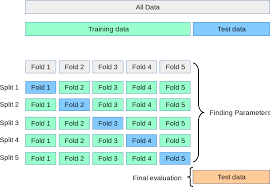

In [179]:
from sklearn.model_selection import cross_val_score

In [180]:
score=cross_val_score(lgr,train_x,train_y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.26106195 0.78492239 0.80709534 0.77161863 0.78935698]
0.6828110590035908
0.21117975277558015


In [183]:
from sklearn.model_selection import KFold

In [184]:
kfold=KFold(5)

In [185]:
score=cross_val_score(lgr,train_x,train_y,cv=kfold)
print(score)
print(score.mean())
print(score.std())

[0.68362832 0.7827051  0.827051   0.77161863 0.78935698]
0.7708720051802288
0.04743377296763708


In [186]:
score=cross_val_score(gnb,train_x,train_y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77654867 0.81152993 0.82039911 0.80266075 0.80044346]
0.802316386397975
0.0146933724948878


In [187]:
score=cross_val_score(svc,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.74613003 0.76780186 0.70807453 0.74534161 0.76397516 0.7826087
 0.73913043]
0.7504374747610714
0.02231837099591068


In [188]:
score=cross_val_score(knn,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.80495356 0.80804954 0.82919255 0.8447205  0.79813665 0.82608696
 0.81987578]
0.8187165026193544
0.014968328403953592


In [189]:
score=cross_val_score(dtc,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.80804954 0.81733746 0.78881988 0.82608696 0.83540373 0.81677019
 0.83850932]
0.8187110084308323
0.01575628991481319


In [190]:
score=cross_val_score(rf,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.81114551 0.82972136 0.82608696 0.86645963 0.86335404 0.85093168
 0.86024845]
0.843992516915233
0.019983019543991544


In [191]:
score=cross_val_score(ad,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.82662539 0.83591331 0.83540373 0.84782609 0.86645963 0.84782609
 0.87267081]
0.84753214787059
0.01562764521904682


In [192]:
score=cross_val_score(gb,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.82043344 0.83281734 0.81055901 0.85403727 0.84161491 0.82298137
 0.85714286]
0.8342265968172166
0.016261488694563158


In [193]:
score=cross_val_score(xg,train_x,train_y,cv=7)
print(score)
print(score.mean())
print(score.std())

[13:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [194]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [195]:
y_pred_prob=rf.predict_proba(test_x)[:,1]
y_pred_prob

array([0.04176865, 0.4307296 , 0.21831109, 0.02349377, 0.02882732,
       0.26813596, 0.13245299, 0.01164365, 0.24073796, 0.93319534,
       0.78476271, 0.26517422, 0.05016279, 0.29885477, 0.11819329,
       0.54976636, 0.10578208, 0.3391626 , 0.00698846, 0.07390744,
       0.11462856, 0.88108336, 0.10685271, 0.32169792, 0.11062777,
       0.50678645, 0.02592612, 0.03475398, 0.06585317, 0.14393273,
       0.28583754, 0.04229807, 0.65406431, 0.20404742, 0.30893845,
       0.01797458, 0.0061334 , 0.51113836, 0.02734066, 0.01388232,
       0.46348889, 0.0456802 , 0.01917299, 0.04308709, 0.00994058,
       0.02700889, 0.43020348, 0.17211591, 0.00656862, 0.00616266,
       0.85106427, 0.06924401, 0.00766954, 0.06723702, 0.05356489,
       0.19118641, 0.05234273, 0.10531821, 0.0088242 , 0.14423154,
       0.02928848, 0.02961425, 0.37742105, 0.40296968, 0.80928419,
       0.07745006, 0.21424808, 0.00708737, 0.0341652 , 0.06976025,
       0.14984195, 0.06206039, 0.18967533, 0.40244312, 0.31004

In [197]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [198]:
fpr

array([0.        , 0.        , 0.        , 0.0013369 , 0.0013369 ,
       0.0026738 , 0.0026738 , 0.0040107 , 0.0040107 , 0.00534759,
       0.00534759, 0.00668449, 0.00668449, 0.00802139, 0.00802139,
       0.01069519, 0.01203209, 0.01203209, 0.01336898, 0.01336898,
       0.01470588, 0.01470588, 0.01604278, 0.01604278, 0.01737968,
       0.01737968, 0.02005348, 0.02005348, 0.02139037, 0.02139037,
       0.02272727, 0.02272727, 0.02406417, 0.02406417, 0.02673797,
       0.02673797, 0.02941176, 0.02941176, 0.03074866, 0.03074866,
       0.03342246, 0.03342246, 0.03609626, 0.03609626, 0.04010695,
       0.04010695, 0.04144385, 0.04144385, 0.04278075, 0.04278075,
       0.04545455, 0.04545455, 0.04679144, 0.04679144, 0.04946524,
       0.04946524, 0.05080214, 0.05080214, 0.05213904, 0.05213904,
       0.05347594, 0.05347594, 0.05614973, 0.05614973, 0.06149733,
       0.06149733, 0.06550802, 0.06550802, 0.06684492, 0.06684492,
       0.06951872, 0.06951872, 0.07085561, 0.07085561, 0.07754

In [199]:
tpr

array([0.        , 0.00454545, 0.22272727, 0.22272727, 0.3       ,
       0.3       , 0.32272727, 0.32272727, 0.33181818, 0.33181818,
       0.33636364, 0.33636364, 0.35      , 0.35      , 0.38181818,
       0.38181818, 0.38181818, 0.39545455, 0.39545455, 0.40454545,
       0.40454545, 0.41818182, 0.41818182, 0.43181818, 0.43181818,
       0.43636364, 0.43636364, 0.44545455, 0.44545455, 0.46363636,
       0.46363636, 0.46818182, 0.46818182, 0.47272727, 0.47272727,
       0.47727273, 0.47727273, 0.49090909, 0.49090909, 0.5       ,
       0.5       , 0.50454545, 0.50454545, 0.55      , 0.55      ,
       0.56363636, 0.56363636, 0.57272727, 0.57272727, 0.57727273,
       0.57727273, 0.58636364, 0.58636364, 0.59090909, 0.59090909,
       0.6       , 0.6       , 0.60454545, 0.60454545, 0.60909091,
       0.60909091, 0.61818182, 0.61818182, 0.62727273, 0.62727273,
       0.63181818, 0.63181818, 0.63636364, 0.63636364, 0.64090909,
       0.64090909, 0.64545455, 0.64545455, 0.65      , 0.65   

In [200]:
thresholds

array([1.97894011, 0.97894011, 0.76127636, 0.75646271, 0.69706708,
       0.69584341, 0.68553307, 0.68459672, 0.68245795, 0.68116526,
       0.67708165, 0.66810629, 0.66228574, 0.66219847, 0.6450315 ,
       0.642632  , 0.64149906, 0.6386811 , 0.63596113, 0.63317346,
       0.63179201, 0.61863248, 0.61774906, 0.61438078, 0.61338149,
       0.61059898, 0.60931618, 0.60822162, 0.608154  , 0.59509555,
       0.59358746, 0.58681804, 0.58449514, 0.58183207, 0.57705612,
       0.57586117, 0.57036117, 0.56554878, 0.56200738, 0.55872109,
       0.55704531, 0.55639007, 0.55527969, 0.51694231, 0.51497943,
       0.51113836, 0.51103068, 0.50559856, 0.5030062 , 0.50255195,
       0.50197064, 0.49943803, 0.49732656, 0.49723628, 0.49576252,
       0.4906299 , 0.48669709, 0.48517501, 0.48397166, 0.48090418,
       0.48021212, 0.47613494, 0.47079897, 0.46407737, 0.46138173,
       0.45849465, 0.45148444, 0.45147686, 0.44894381, 0.44800998,
       0.44530867, 0.44393432, 0.44290494, 0.43797681, 0.43617

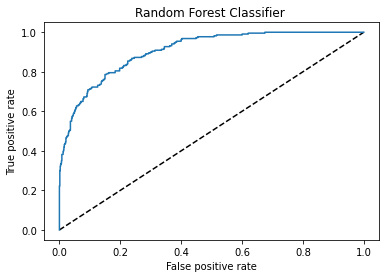

In [201]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier ')
plt.show()

In [202]:
auc_score=roc_auc_score(test_y,rf.predict(test_x))
print(auc_score)

0.7681818181818183


# Conclusions

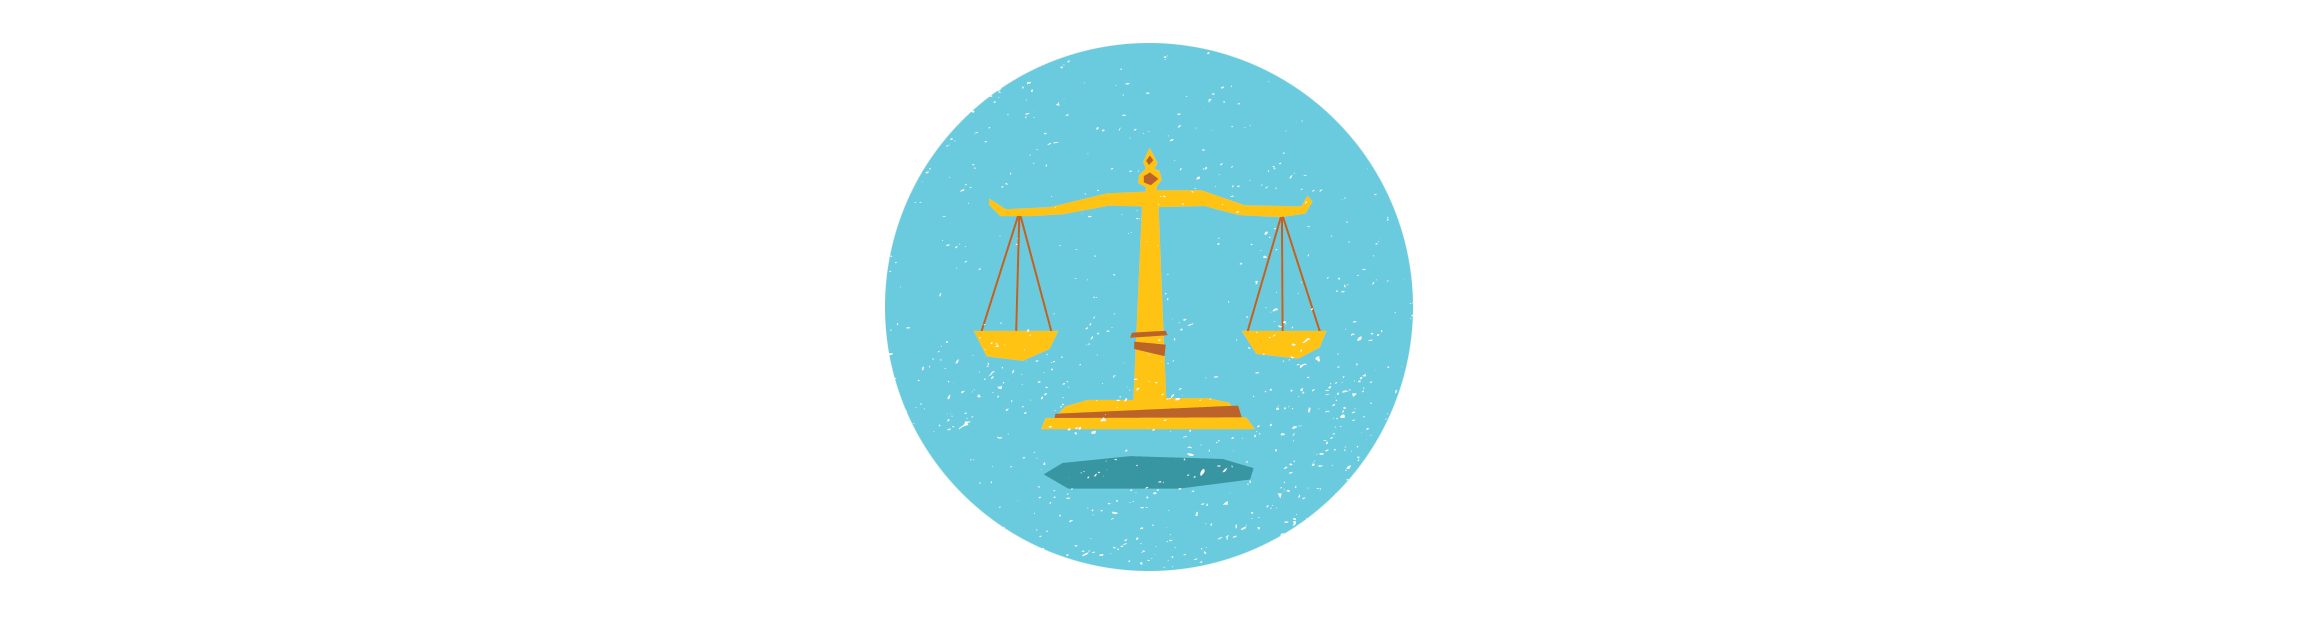

In [203]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rf.predict(test_x))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

original  predicted
0           0          0
1           1          0
2           1          0
3           0          0
4           0          0
..        ...        ...
963         0          0
964         0          1
965         0          0
966         0          0
967         1          1

[968 rows x 2 columns]

# Model saving

In [204]:
import pickle
filename="census_income.pkl"
pickle.dump(rf,open(filename,'wb'))

# 😊The End😊